# **Tugas 1**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

    1. Menggunakan data spam.csv

    2. Fitur CountVectorizer dengan mengaktifkan stop_words

    3. Evaluasi hasilnya

3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

    1. Menggunakan data spam.csv

    2. Fitur TF-IDF dengan mengaktifkan stop_words

    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

## **Model Klasifikasi SVM untuk Data Suara (voice.csv)**

## 1. Import Libraries dan Load Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('voice.csv')

# Melihat data
print(data.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

## 2. Preprocessing Data

In [3]:
X = data.drop('label', axis=1)
y = data['label'].map({'male': 1, 'female': 0})  # Encode label

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Membangun Model SVM

In [4]:
# Buat model SVM dengan kernel RBF
model = SVC(kernel='rbf', class_weight='balanced')

# Train model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.54      0.60       297
           1       0.65      0.77      0.71       337

    accuracy                           0.66       634
   macro avg       0.67      0.65      0.65       634
weighted avg       0.66      0.66      0.66       634



## 4. Confusion Matrix

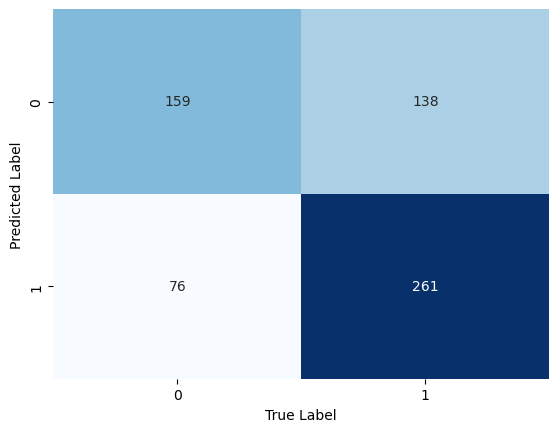

In [5]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


## **Model Klasifikasi Multinomial Naive Bayes dengan CountVectorizer (spam.csv)**

### 1. Import Libraries dan Load Data

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Load dataset
spam_data = pd.read_csv('spam.csv', encoding='latin-1')

# Hapus kolom yang tidak digunakan
spam_data = spam_data[['v1', 'v2']]  # v1 adalah label, v2 adalah teks

# Rename columns for easier use
spam_data.columns = ['label', 'text']

# Encode label
spam_data['label'] = spam_data['label'].map({'spam': 1, 'ham': 0})

### 2. CountVectorizer dengan stop_words

In [8]:
# Menggunakan CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Pisahkan fitur dan label
X = vectorizer.fit_transform(spam_data['text'])
y = spam_data['label']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Membangun Model Multinomial Naive Bayes

In [9]:
# Buat model Multinomial Naive Bayes
model_nb = MultinomialNB()

# Train model
model_nb.fit(X_train, y_train)

# Prediksi
y_pred = model_nb.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 4. Confusion Matrix

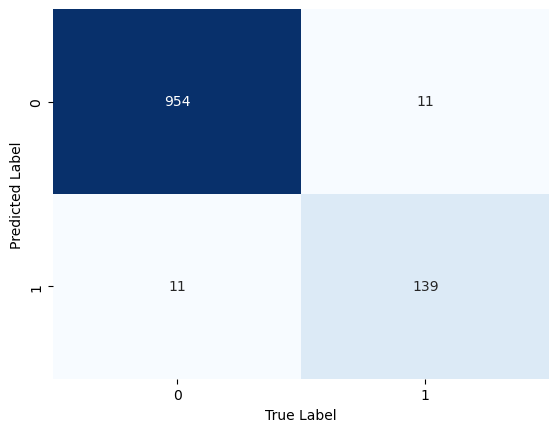

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


## **Model Klasifikasi Multinomial Naive Bayes dengan TF-IDF (spam.csv)**

### 1. TF-IDF Vectorizer dengan stop_words

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Pisahkan fitur dan label
X_tfidf = tfidf_vectorizer.fit_transform(spam_data['text'])
y = spam_data['label']

# Bagi data menjadi training dan testing
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


### 2. Membangun Model Multinomial Naive Bayes dengan TF-IDF

In [12]:
# Buat model Multinomial Naive Bayes
model_nb_tfidf = MultinomialNB()

# Train model
model_nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Prediksi
y_pred_tfidf = model_nb_tfidf.predict(X_test_tfidf)

# Evaluasi model
print(classification_report(y_test_tfidf, y_pred_tfidf))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### 3. Confusion Matrix

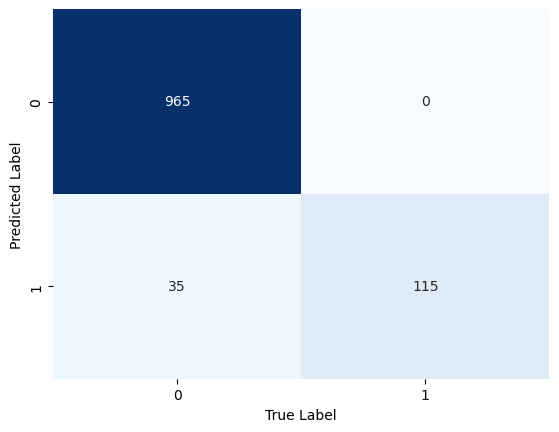

In [13]:
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


### Kesimpulan:

**CountVectorizer** lebih efektif jika dokumen pendek dan menggunakan banyak kata-kata umum.

**TF-IDF** bekerja lebih baik jika Anda ingin fokus pada kata-kata yang lebih spesifik dalam konteks dokumen.